# Lecture 7

In [1]:
load("products/data.rda")
dat1 <- data

In [2]:
load("data.rda")
dat2 <- data

In [3]:
ls()

[1] "dat1" "dat2" "data"

In [4]:
attach(dat2)

Sommando semplicemente numeri a dei vettori, e.g. quello dei _salary_, si ottengono delle traslazioni.

In [5]:
t_salary <- salary+1000

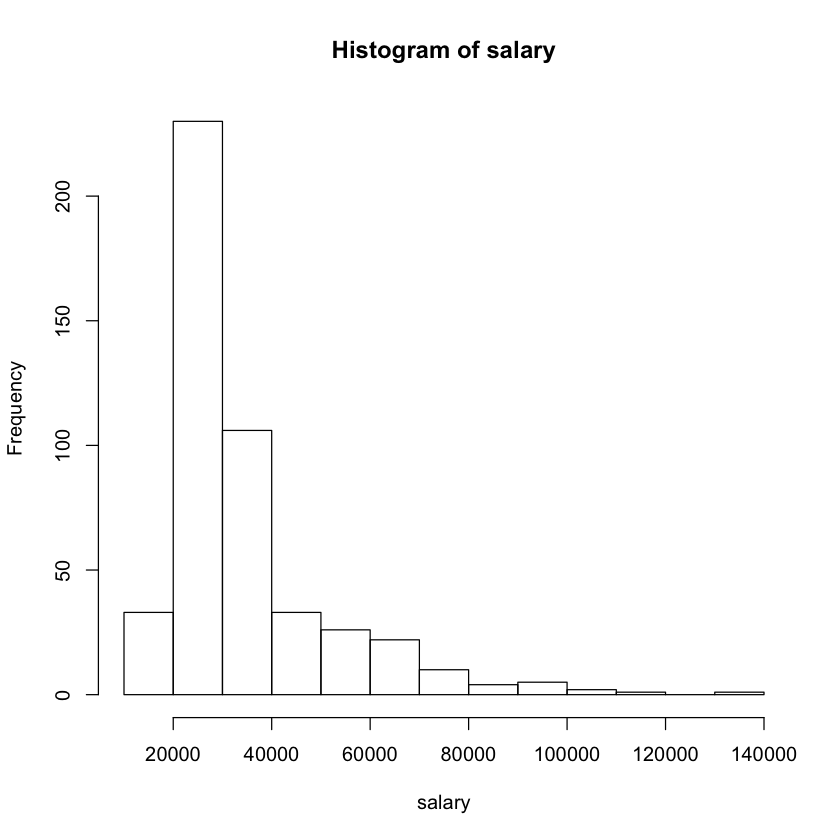

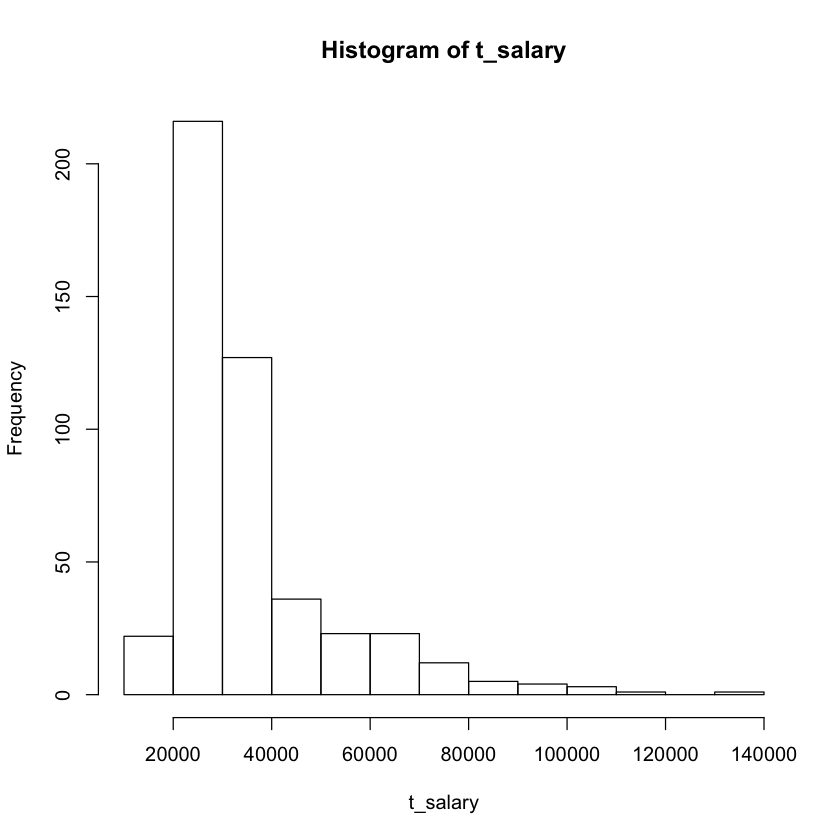

In [6]:
hist(salary)
hist(t_salary)

Sappiamo che la media del salario trasposto è uguale alla media del salario iniziale con la trasposizione. 
$$
    \sigma_{salary+1000} = \sigma_{salary} + 1000
$$

In [7]:
mean(t_salary) == mean(salary) + 1000

[1] TRUE

Si può andare a confrontare anche la variabilità: come ci si aspetta, le loro _deviazioni standard_ sono uguali.

In [8]:
sd(t_salary) == sd(salary)
sd(salary)

[1] TRUE

[1] 17093.72

In [9]:
summary(t_salary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16750   25000   29800   35418   38050  136000 

In [10]:
summary(salary)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15750   24000   28800   34418   37050  135000 

## Standardizzazione

Significa cambiare scala in maniera tale che la media sia nulla e l'unità di misura sia la deviazione standard. In particolare, si esegue come:
$$
    \frac{x - \langle x \rangle}{\sigma(x)}
$$

In [11]:
salary_z <- (salary - mean(salary)) / (sd(salary))

In [12]:
mean(salary_z)

[1] 9.611853e-17

Lo stesso procedimento può essere eseguito anche con la funzione `scale`. Vi è comunque differenza tra i due oggetti che si vanno a creare: la funzione `scale` rimanda una **lista**, e non un **vettore**: sono due oggetti diversi.

In [13]:
salary_z_2 <- scale(salary)

In [14]:
str(salary_z)
str(salary_z_2)

 num [1:473] 1.321 0.338 -0.759 -0.732 0.619 ...
 num [1:473, 1] 1.321 0.338 -0.759 -0.732 0.619 ...
 - attr(*, "scaled:center")= num 34418
 - attr(*, "scaled:scale")= num 17094


In [15]:
salary[40]
salary_z[40]

[1] 19200

[1] -0.8902944

Il significato della riga sopra è che, quando il valore è $ \$19 200 $, esso è $-89\% \cdot \\$17 000$ in meno della media.

------
-----

## Random Sampling

Vediamo qualcosa di probabilità. 

Per prendere dei numeri casuali, si utilizza la funzione `sample`. In particolare, ne prendiamo 5 nell'intervallo [1,40]

In [16]:
sample(1:40,5)

[1] 33  5 12 40  8

Vediamo un esempio per fare estrazioni di _Testa_ o _Croce_.

In [17]:
sample(c("H", "T"), 10, replace=T)

[1] "T" "H" "T" "T" "T" "T" "H" "H" "T" "H"

Si può inoltre specificare la probabilità delle differenti variabili.

In [18]:
sample(c("succ", "fail"), 10, replace=T, prob=c(0.9, 0.1))

[1] "fail" "succ" "succ" "succ" "succ" "succ" "succ" "succ" "succ" "fail"

### Coefficiente binomiale 
Con la funzione `choose` si può calcolare il coefficiente binomiale. 

Sotto, si mostra in quanti modi si possono prendere 2 numeri da un pool di 10 numeri. 

In [19]:
choose(10, 2)

[1] 45

Carichiamo la libreria `prob` per fare alcuni giochi di probabilità.

Mi sono perso una serie di cose con `prob` perché non riuscivo a installare pacchetto. 

In [20]:
library(prob)

Loading required package: combinat

Attaching package: ‘combinat’

The following object is masked from ‘package:utils’:

    combn

Loading required package: fAsianOptions
Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics
Loading required package: fOptions

Attaching package: ‘prob’

The following objects are masked from ‘package:base’:

    intersect, setdiff, union



## Formula di Bayes

Anche in R si possono simulare calcoli della formula di Bayes. Si ricordi:
$$
    P(A|B) = \frac{P(B|A) \cdot P(A) } {P(B)}
$$

Facciamo un esempio:

3 tavoli, con cassetti e delle monete d'argento o d'oro. Si chiede di calcolare la probabilità che, estratta una moneta d'oro, anche un altro cassetto ce l'abbia. 

Si definisce `prob_GC` di trovare una moneta d'oro, per i 3 cassetti. La probabilità a priori, di estrazione, è `prior`. Con `post_GC` si definisce la probabilità a posteriori.

In [21]:
prob_GC <- c(1,1/2,0)

In [22]:
prior <- c(1/3,1/3,1/3)

In [23]:
post_GC <- prob_GC * prior

In [24]:
formula_di_Bayes = post_GC / sum(post_GC)
formula_di_Bayes

[1] 0.6666667 0.3333333 0.0000000

Ho mostrato che la probabilità che l'altro cassetto abbia una moneta d'oro è del 67\%.

----

---- 
Calcolo il valor medio $\mu$ della variabile casuale X definita come il numero di teste ottenuto con il lancio di 3 dadi successivi

In [30]:
matrice_prob <- matrix(c(0,1,2,3, 1/8, 3/8, 3/8, 1/8), 4,2)
matrice_prob

0,0.125
1,0.375
2,0.375
3,0.125


In [37]:
μ = matrice_prob[,1]%*%matrice_prob[,2]
μ

1.5
